In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [76]:
train_data = pd.read_csv('train.csv')
train_data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [189]:
test_data = pd.read_csv('test.csv')
test_data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [78]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


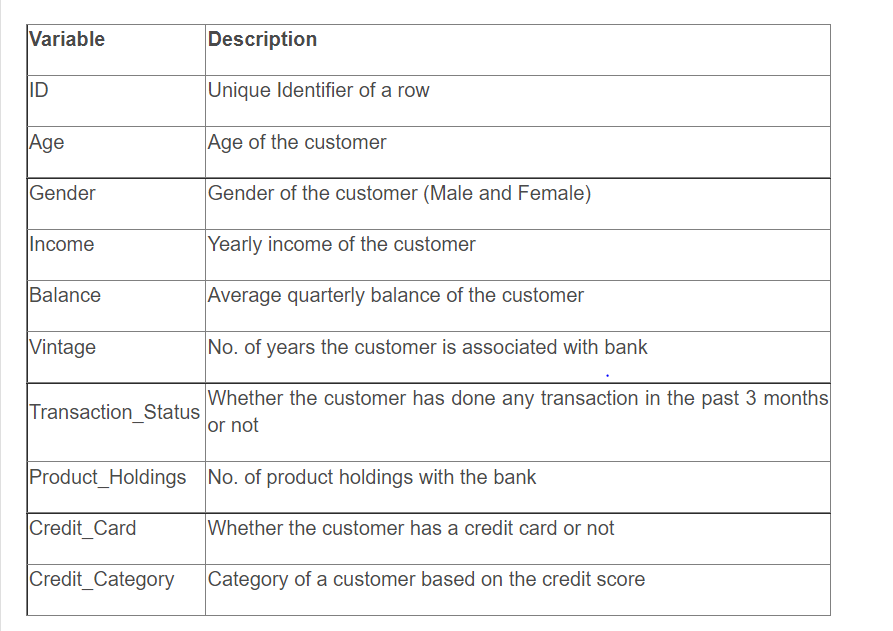

In [79]:
train_data['Churn_indicator'] = np.where(train_data['Is_Churn'] == 1, 'Yes', 'No')

<AxesSubplot:>

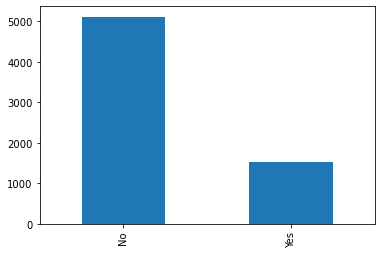

In [80]:
train_data['Churn_indicator'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Churn_indicator', ylabel='count'>

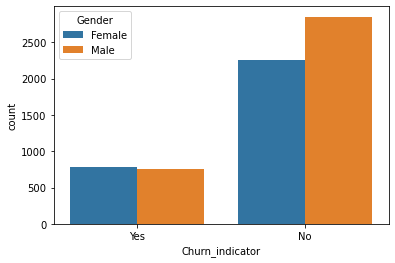

In [81]:
sns.countplot(x='Churn_indicator',data=train_data, hue='Gender')

## Females slightly churned more but not significant

<AxesSubplot:xlabel='Churn_indicator', ylabel='count'>

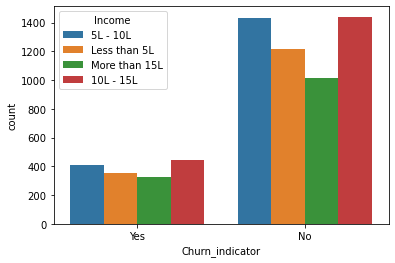

In [82]:
sns.countplot(x='Churn_indicator',data=train_data, hue='Income')

 ## No significant conclusion :)

<AxesSubplot:xlabel='Churn_indicator', ylabel='count'>

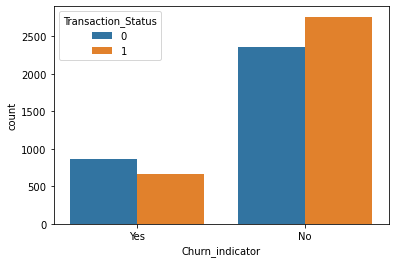

In [83]:
sns.countplot(x='Churn_indicator',data=train_data, hue='Transaction_Status')

##  Customers who did at least 1 transaction in 3 months churned less than the ones who didn't

<AxesSubplot:xlabel='Churn_indicator', ylabel='count'>

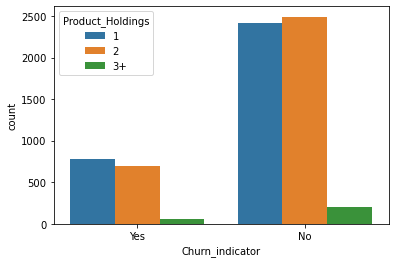

In [84]:
sns.countplot(x='Churn_indicator',data=train_data, hue='Product_Holdings')

## Customers who bought more products in last 6 months churned less, more than 3 bought churned very less

<AxesSubplot:xlabel='Churn_indicator', ylabel='count'>

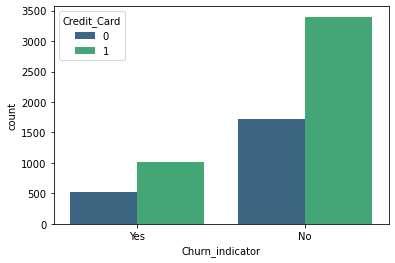

In [85]:
sns.countplot(x='Churn_indicator',data=train_data, hue='Credit_Card', palette='viridis')

## Customers who had credit card churned more

<AxesSubplot:xlabel='Churn_indicator', ylabel='count'>

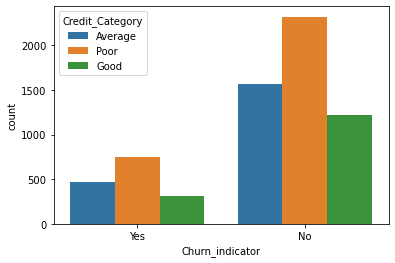

In [86]:
sns.countplot(x='Churn_indicator',data=train_data, hue='Credit_Category')

## Customers with good credit score churned less

<AxesSubplot:xlabel='Churn_indicator', ylabel='count'>

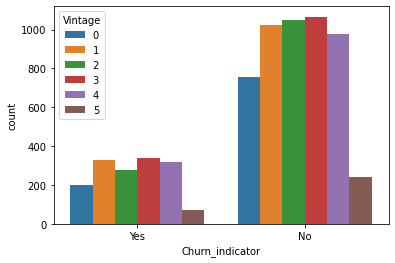

In [87]:
sns.countplot(x='Churn_indicator',data=train_data, hue='Vintage')

## Very new and Very old customers have less churn rate

In [88]:
print('Max '+str(train_data['Age'].max())+'  '+ 'Min '+ str(train_data['Age'].min())+'  '+ 'Avg '+ str(train_data['Age'].mean()) )

Max 72  Min 21  Avg 41.130225563909775


In [89]:
bins   = [0, 24, 40, 60, 72]
labels = ['Students <25', 'Young Workers <40', 'Old Workers <60', 'Retired >60']
train_data['Age_Group'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)
train_data

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Churn_indicator,Age_Group
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,Yes,Young Workers <40
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,No,Old Workers <60
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0,No,Young Workers <40
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,Yes,Old Workers <60
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,Yes,Young Workers <40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1,Yes,Retired >60
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0,No,Old Workers <60
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0,No,Young Workers <40
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1,Yes,Retired >60


<AxesSubplot:xlabel='Churn_indicator', ylabel='count'>

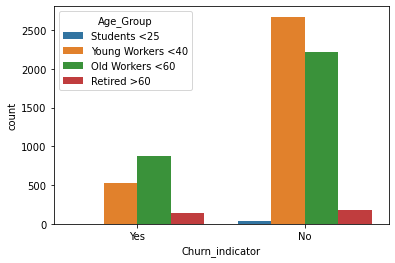

In [90]:
sns.countplot(x='Churn_indicator',data=train_data, hue='Age_Group')

In [91]:
print('Max '+str(train_data['Balance'].max())+'  '+ 'Min '+ str(train_data['Balance'].min())+'  '+ 'Avg '+ str(train_data['Balance'].mean()) )

Max 2436615.81  Min 63.0  Avg 804595.354984962


In [92]:
bins   = [0, 609154, 1218308, 1827462, 2436616]
labels = ['Balance 1', 'Balance 2', 'Balance 3', 'Balance 4']
train_data['Balance_Group'] = pd.cut(train_data['Balance'], bins=bins, labels=labels, right=False)
train_data

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Churn_indicator,Age_Group,Balance_Group
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,Yes,Young Workers <40,Balance 1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,No,Old Workers <60,Balance 2
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0,No,Young Workers <40,Balance 2
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,Yes,Old Workers <60,Balance 3
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,Yes,Young Workers <40,Balance 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1,Yes,Retired >60,Balance 3
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0,No,Old Workers <60,Balance 1
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0,No,Young Workers <40,Balance 2
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1,Yes,Retired >60,Balance 1


<AxesSubplot:xlabel='Churn_indicator', ylabel='count'>

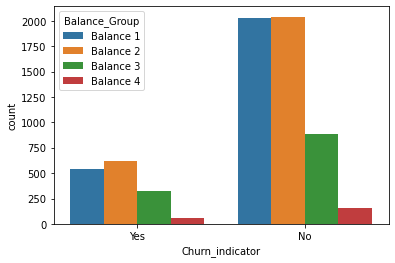

In [93]:
sns.countplot(x='Churn_indicator',data=train_data, hue='Balance_Group')

In [95]:
train_data.drop('ID', inplace=True, axis=1)
train_data

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Churn_indicator,Age_Group,Balance_Group
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,Yes,Young Workers <40,Balance 1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,No,Old Workers <60,Balance 2
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0,No,Young Workers <40,Balance 2
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,Yes,Old Workers <60,Balance 3
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,Yes,Young Workers <40,Balance 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1,Yes,Retired >60,Balance 3
6646,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0,No,Old Workers <60,Balance 1
6647,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0,No,Young Workers <40,Balance 2
6648,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1,Yes,Retired >60,Balance 1


In [100]:
train_data=pd.get_dummies(train_data,drop_first=True)
train_data.drop('Age', inplace=True, axis=1)

SyntaxError: invalid syntax (<ipython-input-100-426b44530491>, line 2)

In [101]:
X = train_data
X

,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor,Churn_indicator_Yes,Age_Group_Young Workers <40,Age_Group_Old Workers <60,Age_Group_Retired >60,Balance_Group_Balance 2,Balance_Group_Balance 3,Balance_Group_Balance 4
0,563266.44,4,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
1,875572.11,2,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
2,701607.06,2,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0
3,1393922.16,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0
4,893146.23,1,1,1,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,1354526.19,4,1,1,1,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0
6646,596286.54,3,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
6647,979298.19,2,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0
6648,395233.65,3,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0


In [102]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [105]:
y = X['Is_Churn']
X.drop(['Is_Churn','']inplace=True, axis=1)

In [107]:
X.drop('Churn_indicator_Yes', inplace=True, axis=1)

In [164]:
X.drop('Balance', inplace=True, axis=1)

In [165]:
X

,Vintage,Transaction_Status,Credit_Card,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor,Age_Group_Young Workers <40,Age_Group_Old Workers <60,Age_Group_Retired >60,Balance_Group_Balance 2,Balance_Group_Balance 3,Balance_Group_Balance 4
0,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,0.8,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6646,0.6,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6647,0.4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
6648,0.6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [167]:
y

0       1.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
6645    1.0
6646    0.0
6647    0.0
6648    1.0
6649    0.0
Name: Is_Churn, Length: 6650, dtype: float64

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [168]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
prediction_logreg=logreg.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))

0.768922305764411


In [ ]:
bins   = [0, 24, 40, 60, 72]
labels = ['Students <25', 'Young Workers <40', 'Old Workers <60', 'Retired >60']
test_data['Age_Group'] = pd.cut(test_data['Age'], bins=bins, labels=labels, right=False)
test_data

In [ ]:
test_ID = test_data['ID']
test_data.drop('ID', inplace=True, axis=1)
test_data

In [144]:
bins   = [0, 609154, 1218308, 1827462, 2436616]
labels = ['Balance 1', 'Balance 2', 'Balance 3', 'Balance 4']
test_data['Balance_Group'] = pd.cut(test_data['Balance'], bins=bins, labels=labels, right=False)
test_data

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Age_Group,Balance_Group
0,50,Female,More than 15L,1008636.39,2,1,2,1,Average,Old Workers <60,Balance 2
1,36,Male,5L - 10L,341460.72,2,0,2,1,Average,Young Workers <40,Balance 1
2,25,Female,10L - 15L,439460.10,0,0,2,1,Good,Young Workers <40,Balance 1
3,41,Male,Less than 5L,28581.93,0,1,2,1,Poor,Old Workers <60,Balance 1
4,48,Male,More than 15L,1104540.03,2,1,3+,0,Good,Old Workers <60,Balance 2
...,...,...,...,...,...,...,...,...,...,...,...
2846,40,Female,10L - 15L,1338458.22,0,0,1,1,Poor,Old Workers <60,Balance 3
2847,48,Female,More than 15L,1448280.27,0,1,2,1,Average,Old Workers <60,Balance 3
2848,59,Male,More than 15L,1100555.64,3,0,1,1,Poor,Old Workers <60,Balance 2
2849,34,Female,5L - 10L,1502818.92,2,0,1,1,Poor,Young Workers <40,Balance 3


In [172]:
test_data.drop(['Prediction'], axis=1, inplace=True)
test_data

,Vintage,Transaction_Status,Credit_Card,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor,Age_Group_Young Workers <40,Age_Group_Old Workers <60,Age_Group_Retired >60,Balance_Group_Balance 2,Balance_Group_Balance 3,Balance_Group_Balance 4
0,2,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0
1,2,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0
3,0,1,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0
4,2,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2847,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
2848,3,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0
2849,2,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0


In [173]:
test_data=pd.get_dummies(test_data,drop_first=True)
test_data

,Vintage,Transaction_Status,Credit_Card,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor,Age_Group_Young Workers <40,Age_Group_Old Workers <60,Age_Group_Retired >60,Balance_Group_Balance 2,Balance_Group_Balance 3,Balance_Group_Balance 4
0,2,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0
1,2,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0
3,0,1,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0
4,2,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2847,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
2848,3,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0
2849,2,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0


In [174]:
X_final = test_data
from sklearn.preprocessing import MinMaxScaler
features = X_final.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_final)
X_final = pd.DataFrame(scaler.transform(X_final))
X_final.columns = features

In [175]:
X_final

,Vintage,Transaction_Status,Credit_Card,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor,Age_Group_Young Workers <40,Age_Group_Old Workers <60,Age_Group_Retired >60,Balance_Group_Balance 2,Balance_Group_Balance 3,Balance_Group_Balance 4
0,0.4,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.4,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2847,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2848,0.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2849,0.4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [176]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

#logreg.fit(X_train,y_train)
prediction_logreg=logreg.predict(X_final)
#print(accuracy_score(y_test,prediction_logreg))

In [177]:
prediction_logreg
len(prediction_logreg)

2851

In [178]:
prediction_logreg

array([0., 0., 0., ..., 0., 0., 0.])

In [179]:
sample = pd.read_csv('sample.csv')
sample.loc[:,'Prediction'] = prediction_logreg
sample.drop(['Is_Churn'], inplace=True, axis=1)
sample.rename({'Prediction': 'Is_Churn'}, axis=1, inplace=True)
sample

,ID,Is_Churn
0,55480787,0.0
1,9aededf2,0.0
2,a5034a09,0.0
3,b3256702,0.0
4,dc28adb5,0.0
...,...,...
2846,19e40adf,0.0
2847,52d5bc8d,0.0
2848,f708121b,0.0
2849,f008715d,0.0


In [180]:
sample.to_csv('Liner_regression.csv',index=False)

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_c=RandomForestClassifier()

In [184]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(X_train,y_train)
best_random=random_cv.best_estimator_
prediction_cv=best_random.predict(X_test)
print(accuracy_score(y_test,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.9s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.2s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.1s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   3.2s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   3.1s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   3.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

In [186]:
prediction_cv=best_random.predict(X_final)
prediction_cv
len(prediction_cv)

2851

In [187]:
sample = pd.read_csv('sample.csv')
sample.loc[:,'Prediction'] = prediction_cv
sample.drop(['Is_Churn'], inplace=True, axis=1)
sample.rename({'Prediction': 'Is_Churn'}, axis=1, inplace=True)
sample

,ID,Is_Churn
0,55480787,0.0
1,9aededf2,0.0
2,a5034a09,0.0
3,b3256702,0.0
4,dc28adb5,0.0
...,...,...
2846,19e40adf,0.0
2847,52d5bc8d,0.0
2848,f708121b,0.0
2849,f008715d,0.0


In [188]:
sample.to_csv('Random_Classifier.csv',index=False)

In [190]:
print('Max '+str(test_data['Balance'].max())+'  '+ 'Min '+ str(test_data['Balance'].min())+'  '+ 'Avg '+ str(test_data['Balance'].mean()) )

Max 2434833.81  Min 1503.0  Avg 809899.0000175374
